# Example

## Prepare

In [1]:
# Matplotlib config
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.rc = {'figure.figsize': (12.0, 9.0)}

import pandas as pd
import numpy as np
import seaborn as sns
import control as cs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets
import math
import mpmath
import sympy
import control.matlab as ml
from IPython.display import HTML


## Helping functions

In [2]:
def bode_plt(Gs, K):
    fig, ax = plt.subplots()
    w = np.logspace(-2.,2.)
    K = ml.tf([K],[1])
    G0 = ml.series(K,Gs)
    try:
        mag,phase,omega = ml.bode(G0,w,dB="true");
        plt.tight_layout()

        gm, pm, wg, wp = ml.margin(G0)

        # find the cross-over frequency and gain at cross-over
        wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
        Kcu = np.interp(wc,omega,mag)
        #mag0 = np.interp(0.0,mag,omega)
        #mag1 = np.interp(0.0,np.flipud(mag),np.flipud(omega))

        ax1,ax2 = plt.gcf().axes     # get subplot axes

        plt.sca(ax1)                 # magnitude plot
        #plt.plot(plt.xlim(),[Kcu,Kcu],'r--')
        plt.plot(plt.xlim(),[0,0],'r--')
        #plt.plot([mag1,mag1],plt.ylim(),'r--')
        plt.plot([wg,wg],plt.ylim(),'r--')
        plt.title("Gain at Crossover = {0:.3g}".format(Kcu))

        plt.sca(ax2)                 # phase plot
        plt.plot(plt.xlim(),[-180,-180],'r--')
        plt.plot([wg,wg],plt.ylim(),'r--')
        plt.title("Crossover Frequency = {0:.3g} rad/sec".format(wg));
    except:
        print('No Bode')
    
    return fig

In [3]:
def nyquist_plt(Gs, K):
    # create figure and axis labels
    fig, ax = plt.subplots()
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    ax.axvline(x=0, color='k', lw=1)
    ax.axhline(y=0, color='k', lw=1)
    ax.grid(True, which='both')
    plt.title("Nyquist with K = {} ".format(K));
    
    K = ml.tf([K],[1])
    G0 = ml.series(K,Gs)
    
    #ml.nyquist(G0)
    try:
        real, imag, ww = ml.nyquist(G0)
        ax.plot(real, imag, "g")
        ax.grid()
        #ax.title('Nyquist with K = {}'.format(K))
        plt.grid()
        #ax.arrow(real[imag.argmin()],0,0,imag.min(),color='g')
    except:
        print('No Nyquist')
    #finally:
        
    return fig

## Example

### RC network

![image.png](./images/RC.png)


\begin{eqnarray}
    U_{e}\left( t\right) =& U_{R}\left( t\right) + U_{a}\left( t\right)
\end{eqnarray}

\begin{eqnarray}
    \text{mit: }U_{R}\left( t\right) =& R* I \left( t\right) \\
    I \left( t\right) =& C * \frac{du_{a}}{dt} = C * \dot{U}_{a} \left( t \right)
\end{eqnarray}

\begin{eqnarray}
    \downarrow \\
    \text{mit: }T =& R * C \\
    T * \dot{U}_{a} + U_{a} =& U_{e} 
\end{eqnarray}


**G(x,t)**

In [4]:
R = 1
C = 1

T1 = R*C

In [5]:
K = 1
num =[K]
den = [T1, 1]

In [6]:
G = ml.tf(np.array(num),np.array(den))
G

TransferFunction(array([1]), array([1, 1]))

In [12]:
def pt1_anim(K=1,R=1,C=1):
    
    try:
        T1 = R*C
    except:
        T1=0
        
    num = np.array([1])
    den = np.array([T1, 1])
        
    
    G = ml.tf(num,den)
    GK = ml.tf([K],[1])
    G0 = ml.series(GK,G)
    Gw = ml.feedback(G0)
    print('G0 = ',G0)
    ##step
    #fig_pt1 = step_plt(G,K)
    y, t = ml.step(Gw)
    #t, y= ct.step_response(Gw)
    ##Plot
    fig_pt1, ax = plt.subplots()
    ax.grid(True, which='both')
    #ax = fig_pt1.axes
    ax.plot(t,y)
    #ax.grid(True, which='both')
    plt.title("Step response with K = {}; T = {}".format(K,-1/ml.pole(G)));
    
    #niquist
    nq_pt1 = nyquist_plt(G,K)
    
    
    #bode
    b_pt1 = bode_plt(G,K)
    
    

In [13]:
widgets.interact_manual(pt1_anim, K=(0.1, 40, .1), R=(0.1, 100, 1), C=(.1, 10, .1));

interactive(children=(FloatSlider(value=1.0, description='K', max=40.0, min=0.1), FloatSlider(value=1.0, descr…

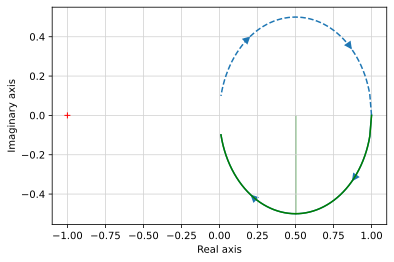

In [11]:
try:
    fig, ax = plt.subplots()
    real, imag, ww = ml.nyquist(G)
    ax.plot(real, imag, "g")
    ax.grid()
     #ax.title('Nyquist with K = {}'.format(K))
    plt.grid()
    result = np.where(imag==imag.min())
    ax.arrow(real[imag.argmin()],0,0,imag.min(),color='g')
except:
    print('No Nyquist')

In [12]:
imag.min()

-0.49999867187348146

In [13]:
result = np.where(imag==imag.min())
result

(array([499, 500]),)

In [14]:
imag.argmin()

499

In [18]:
sys_rc = ml.tf2ss(G)
sys_rc

StateSpace(array([[-1.]]), array([[1.]]), array([[1.]]), array([[0.]]))

In [19]:
sys_rc.A

matrix([[-1.]])

In [20]:
sys_rc.B

matrix([[1.]])

In [22]:
sys_rc.C

matrix([[1.]])

In [23]:
sys_rc.D

matrix([[0.]])